In [1]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from zse.collections import *
from zse.utilities import *
from zse.rings import *

from matplotlib import cm
from ase.visualize import view

import math
from collections import Counter

In [2]:
def get_fw_data(file,code):
    file = open(file,'r')
    data = file.readlines()
    file.close()
    
    for i,line in enumerate(data):
        fields = line.split()
        if fields[0] == code:
            start = i
            break
    
    # go through fw chunk and get data
    
    t_sites = {}
    o_sites = {}
    for i,line in enumerate(data[start+1:]):
        line = line.rstrip(' \n')
        
        # check if the rings exist
        
#         if 'FAILED' in line or 'LARGE' in line:
#             return(False,False)
#         fields = line.split()
        
        # get the t site rings
        
        if 'T' in line and ':' in line:
            fields = line.split(':')
            t_sites[fields[0]]=fields[1]
#         for x in t_sites:
#             r = t_sites[x].split('_')
#             if len(r)>20:
#                 return(False,False)
                
        
        # get the o site rings
        if 'O' in line and ':' in line:
            fields = line.split(':')
            o_sites[fields[0]]=fields[1]
#         for x in o_sites:
#             r = o_sites[x]
#             if len(r)>20:
#                 return(False,False)
        
        
        
        fields = line.split()
        if fields[0] == 'Framework':
            end = i+start-1
            break

    return(t_sites,o_sites)

In [3]:
def read_vertex(file,f):
    file = open(file,'r')
    data = file.readlines()
    file.close()
    t_sites = {}
    for line in data:
        if f in line:
            fields = line.split(',')
            temp = fields[-1].rstrip('\n').split('-')
            rings = []
            for t in temp:
                if '_' in t:
                    size,mult = t.split('_')
                    mult = int(mult)
                    for i in range(mult):
                        rings.append(size)
                elif t == '*':
                    pass
                else:
                    rings.append(t)
            rings = '_'.join(rings)
            t_sites[fields[1]] = rings
    return t_sites
t = read_vertex('iza_vertex_symbols.csv','POR')
print(t)
# t = get_fw_data('crum_rings.txt','TON')[0]
# print(t)

{'T1': '4_4_4_6_8_8_8', 'T2': '4_8_8_6_6_8_8_6_6_8', 'T3': '4_4_4_8_8_6_8', 'T4': '4_6_4_6_6_6_4_8_8_8'}


In [43]:
def dcg(result):
    dc = []
    for idx, val in enumerate(result): 
        numerator = 2**val - 1
        # add 2 because python 0-index
        denominator =  np.log2(idx + 2) 
        score = numerator/denominator
        dc.append(score)
    return sum(dc)
def ndcg(result, sorted_result): 
    dc = dcg(result)
    idc = dcg(sorted_result)
    ndc = dc / idc
    return ndc
v1 = [1,2,4,5,6,9]
v2 = [1,2,5,4,6,7]
print(dcg(v1))
print(dcg(v2))
print(ndcg(v1,sorted(v1,reverse=True)))
print(ndcg(v2,sorted(v2,reverse=True)))

230.13736202896501
94.4629772503102
0.4007787300563799
0.4965842275794656


In [8]:
def cs(v1,v2):
    c1 = Counter(v1)
    c2 = Counter(v2)
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k,0)*c2.get(k,0) for k in terms)
    magA = math.sqrt(sum(c1.get(k,0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k,0)**2 for k in terms))
    return dotprod/(magA*magB)
listA = ['apple', 'orange', 'apple', 'apple', 'banana', 'orange'] # (length = 6)
listB = ['apple', 'orange', 'grapefruit', 'apple'] # (length = 4)
cs(listA,listB)
v1 = [1,2,4,5,6,9]
v2 = [1,2,5,4,6,7]
cs(v1,v2)

0.8333333333333335

In [52]:
def sim(v1,v2):
    l1 = len(v1)
    l2 = len(v2)
    counter = 0
    if l1 > l2:
        for v in v2:
            if v in v1:
                counter += 1
                v1.remove(v)
    else:
        for v in v1:
            if v in v2:
                counter += 1
                v2.remove(v)
    
    m = max(l1,l2)
    s = counter/m
    return s

In [74]:
file1 = 'goetzke_rings.txt'
file2 = 'sastre_rings.txt'
fws = get_all_fws()
similarity = 0
counter = 0
sims = []
for f in fws:
    gt = get_fw_data(file1,f)[0]
    st = get_fw_data(file2,f)[0]
    for t in gt:
        gr = [int(x) for x in gt[t].split('_')]
        sr = [int(x) for x in st[t].split('_')]
        s = sim(gr,sr)
        similarity+=s
        sims.append(s)
        counter += 1
#         print(f,t,s)
print(similarity/counter)

0.7287620227441489


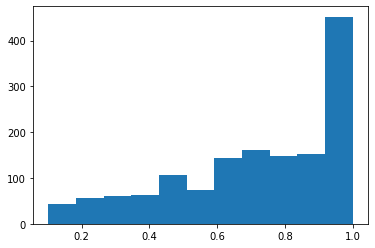

In [75]:
plt.hist(sims,bins=11)
plt.show()

In [72]:
file1 = 'goetzke_rings.txt'
file2 = 'crum_rings.txt'
fws = get_all_fws()
similarity = 0
counter = 0
sims = []
for f in fws:
    gt = get_fw_data(file1,f)[0]
    st = get_fw_data(file2,f)[0]
    for t in gt:
        gr = [int(x) for x in gt[t].split('_')]
        sr = [int(x) for x in st[t].split('_')]
        s = sim(gr,sr)
        similarity+=s
        counter += 1
        sims.append(s)
#         print(f,t,s)
print(similarity/counter)



0.7638813872055722


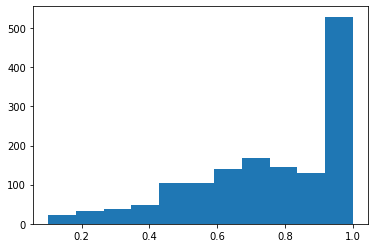

In [73]:
plt.hist(sims,bins=11)
plt.show()

In [67]:
file1 = 'sastre_rings.txt'
file2 = 'crum_rings.txt'
fws = get_all_fws()
similarity = 0
counter = 0
sims = []
for f in fws:
    gt = get_fw_data(file1,f)[0]
    st = get_fw_data(file2,f)[0]
    for t in gt:
        gr = [int(x) for x in gt[t].split('_')]
        sr = [int(x) for x in st[t].split('_')]
        s = sim(gr,sr)
        similarity+=s
        counter += 1
        sims.append(s)
#         print(f,t,s)
print(similarity/counter)




0.913175487121824


924


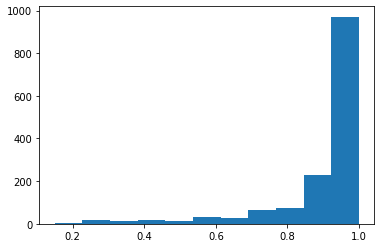

In [71]:
counter = 0
for s in sims:
    if s == 1:
        counter+=1
print(counter)
plt.hist(sims,bins=11)
plt.show()

In [53]:
file1 = 'sastre_rings.txt'
file2 = 'iza_vertex_symbols.csv'
fws = get_all_fws()
similarity = 0
counter = 0
for f in fws:
    gt = get_fw_data(file1,f)[0]
    st = read_vertex(file2,f)
    for t in gt:
        gr = [int(x) for x in gt[t].split('_')]
        sr = [int(x) for x in st[t].split('_')]
        s = sim(gr,sr)
        similarity+=s
        counter += 1
print(similarity/counter)





0.8227448130556972


In [54]:
file1 = 'crum_rings.txt'
file2 = 'iza_vertex_symbols.csv'
fws = get_all_fws()
similarity = 0
counter = 0
for f in fws:
    gt = get_fw_data(file1,f)[0]
    st = read_vertex(file2,f)
    for t in gt:
        gr = [int(x) for x in gt[t].split('_')]
        sr = [int(x) for x in st[t].split('_')]
        s = sim(gr,sr)
        similarity+=s
        counter += 1
print(similarity/counter)

0.7723900116041011


In [55]:
file1 = 'goetzke_rings.txt'
file2 = 'iza_vertex_symbols.csv'
fws = get_all_fws()
similarity = 0
counter = 0
for f in fws:
    gt = get_fw_data(file1,f)[0]
    st = read_vertex(file2,f)
    for t in gt:
        gr = [int(x) for x in gt[t].split('_')]
        sr = [int(x) for x in st[t].split('_')]
        s = sim(gr,sr)
        similarity+=s
        counter += 1
print(similarity/counter)

0.5857666354818196


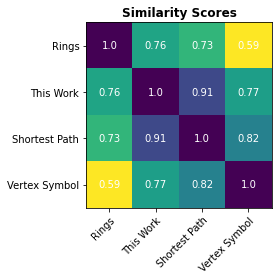

In [95]:
heats = np.array([[1,0.76,0.73,0.59],[0.76,1,0.91,0.77],[0.73,0.91,1,0.82],[0.59,0.77,0.82,1]])
fig, ax = plt.subplots()
im = ax.imshow(heats,cmap='viridis_r')
labels = ['Rings','This Work','Shortest Path','Vertex Symbol']
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j,i,heats[i,j],
        ha = "center", va = "center", color = "w")
ax.set_title('Similarity Scores',weight='bold')
fig.tight_layout()
plt.savefig('../figures/completed-figures/similarity-heat-map.pdf',dpi=300)
plt.show()

In [9]:
file1 = 'goetzke_rings.txt'
file2 = 'sastre_rings.txt'
fws = get_all_fws()
similarity = 0
counter = 0
f = 'AFI'
gt = get_fw_data(file1,f)[0]
st = get_fw_data(file2,f)[0]
for t in gt:
    gr = [int(x) for x in gt[t].split('_')]
    sr = [int(x) for x in st[t].split('_')]
    print(gr)
    print(sr)
    print(cs(gr,sr))
#     print(ndcg(sr,gr))
#     print(ndcg(gr,sr))
#     print(sim(gr,sr))

[4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 12, 14, 14, 14, 14, 14, 14, 14]
[4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
0.8790490729915326


In [6]:
28/(14+22)

0.7777777777777778

In [7]:
14/22

0.6363636363636364